# Matemática para Ciencia de los Datos

-Profesor: Luis Alexánder Calvo Valverde.

- Documento base: Saúl Calderón, Žiga Emeršič, Ángel García, Blaž Meden, Felipe Meza, Martín Solís, Juan Esquivel, Mauro Méndez, Manuel Zumbado.
# Ejercicio Matrices


Se utilizará el archivo "california_housing_test.csv". 

Para poner en práctica la manera estándar de abordar un sistema lineal, queremos expresar los datos de la forma $A\vec{x}=b$ donde $b$, el objetivo, es un vector con los datos de la última columna (asumiendo que queremos predecir el precio medio de las casas en el conjunto de datos). El resto de las columnas representarán la matriz $A$. 

- Una vez divididos los datos, proponga valores de $\vec{x}$ que tengan sentido de forma intuitiva y realizar la multiplicación vector. El resultado de esta parte es obtener una primera predicción  de los valores de las casas. El objetivo de este ejercicio es que los estudiantes se familiaricen con los datos. Es útil en este tipo de tareas validar el conocimiento de dominio con lo que eventualmente generará un modelo. Por ejemplo, si la longitud y latitud se consideran irrelevantes, un $\vec{x}$ de prueba podría asignar valores cercanos a cero (o cero incluso) a esas columnas, pero asignar valores altos a factores que se deseen como el ingreso promedio de la región. 
- Luego mostrar las diferencias entre las predicciones.


In [1]:
# cargar dataset
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
###############################################################################
%matplotlib inline
import math 
import numpy as np
import pandas as pd

# cargar el archivo csv
#archivo = "sample_data/california_housing_test.csv"
archivo = "california_housing_test.csv"

dataFrame = pd.read_csv(archivo, header = 0, delimiter=',')
colNames = dataFrame.columns
print(dataFrame.head() )


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  


In [3]:
# Convertir de pandas a numpy
test = pd.DataFrame(dataFrame).to_numpy()

# ver dimensiones
total_columnas = test.shape[1] # columnas
total_filas = test.shape[0] # filas
print("Total filas ", total_filas)
print("Total columnas ", total_columnas)


Total filas  3000
Total columnas  9


In [4]:
def muestreVectorConNombre( pVector , pNombres):
    for i in range( len(pVector)):
        print( pNombres[i] , " : ", pVector[i] )
    print("\n")
    

In [5]:
# cargar A y b

# A , 8 columnas
# longitude, latitude, housing_median_age, total_rooms,
# total_bedrooms, population, households, median_income
A = test[:, 0:total_columnas - 1] # todas menos la última
print("Primer fila de A: ")
muestreVectorConNombre( A[0], colNames)

# b  , 1 columna
# median_house_value
b = test[:, total_columnas - 1]  # la última
print("Primeros elementos de b: ", b[0:5])


Primer fila de A: 
longitude  :  -122.05
latitude  :  37.37
housing_median_age  :  27.0
total_rooms  :  3885.0
total_bedrooms  :  661.0
population  :  1537.0
households  :  606.0
median_income  :  6.6085


Primeros elementos de b:  [344700. 176500. 270500. 330000.  81700.]


# La siguiente celda nueva

Escala todas las columnas de A entre 0 y 1

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
A = scaler.fit_transform(A)
print(A[0])


[0.21981424 0.51388889 0.50980392 0.12741427 0.12165405 0.12841576
 0.12256494 0.42127695]


In [7]:
# Muchos cuartos

# longitude, latitude, housing_median_age, total_rooms,
# total_bedrooms, population, households, median_income
x_muchos_cuartos = np.array([ 0, 0, 0, 1, 2, 0, 0, 0])

muestreVectorConNombre(x_muchos_cuartos, colNames)

b_cuartos = np.matmul(A, x_muchos_cuartos)

print("b_cuartos: ", b_cuartos)

longitude  :  0
latitude  :  0
housing_median_age  :  0
total_rooms  :  1
total_bedrooms  :  2
population  :  0
households  :  0
median_income  :  0


b_cuartos:  [0.37072237 0.16311826 0.30414156 ... 0.10467724 0.00738674 0.15414152]


In [8]:
# alto ingreso y baja poblacion

# longitude, latitude, housing_median_age, total_rooms,
# total_bedrooms, population, households, median_income
x_alto_ingreso_baja_poblacion = np.array([0, 0, 0, 0, 0, -1, 0, 1000])

muestreVectorConNombre(x_alto_ingreso_baja_poblacion, colNames)

b_ingreso = np.matmul(A, x_alto_ingreso_baja_poblacion)

print( b_ingreso )

longitude  :  0
latitude  :  0
housing_median_age  :  0
total_rooms  :  0
total_bedrooms  :  0
population  :  -1
households  :  0
median_income  :  1000


[421.14853215 213.66069338 364.93995698 ... 123.36131758 191.09047923
 555.85377104]


In [9]:
from numpy import linalg as LA
# pinv es la pseudo-inversa

pesos = np.dot( LA.pinv(A), b)

muestreVectorConNombre(pesos, colNames)

longitude  :  -47089.19187132734
latitude  :  -60255.36197031093
housing_median_age  :  119203.03778538507
total_rooms  :  -645487.223251879
total_bedrooms  :  723564.734287215
population  :  -387521.7595409842
households  :  487096.87172503467
median_income  :  711958.2264203575




In [10]:
b_calculado = np.matmul(A, pesos)
print( "b_calculado: ", b_calculado )

b_calculado:  [335103.72378097 221132.05245182 274044.35234673 ...  68695.87294556
 182532.77261507 456305.95624925]


In [11]:
# Ver diferencias

dif_b_y_bcuartos = LA.norm(b - b_cuartos)
print("Entre b y b_cuartos: ", dif_b_y_bcuartos)

dif_b_y_bingreso = LA.norm(b - b_ingreso)
print("Entre b y b_ingreso: ", dif_b_y_bingreso)

dif_b_y_bcalculado = LA.norm(b - b_calculado)
print("Entre b y b_calculado: ", dif_b_y_bcalculado)



Entre b y b_cuartos:  12864412.134722287
Entre b y b_ingreso:  12851214.996127838
Entre b y b_calculado:  4109158.063586384


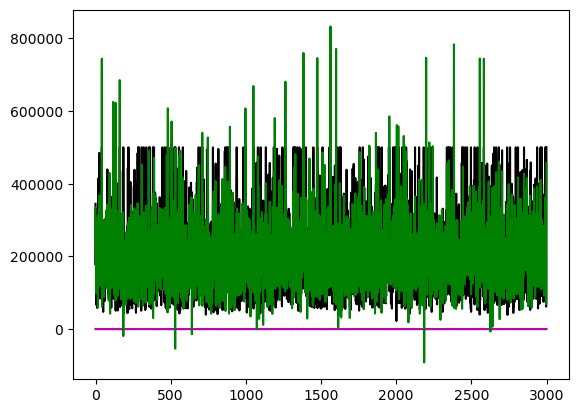

In [12]:
# Graficar predicciones

import matplotlib.pyplot as plt

cantidad_muestras = len(b)
eje_X = np.array(range(cantidad_muestras))

plt. plot(eje_X, b, label = "b", color="k") # black
plt. plot(eje_X, b_cuartos, label = "b_cuartos", color= "y") # yellow
plt. plot(eje_X, b_ingreso, label = "b_ingreso", color= "m") # magenta
plt. plot(eje_X, b_calculado, label = "b_calculado", color= "g") # green

plt.show()

In [68]:
import plotly.express as px

parte1 = np.array([x for x in range(len(b))])
parte2 = np.array([x for x in range(len(b_calculado))])
parte3 = np.array([x for x in range(len(b_cuartos))])
parte4 = np.array([x for x in range(len(b_ingreso))])

x = np.concatenate((parte1, parte2, parte3, parte4))
y = np.concatenate((parte1, parte2, parte3, parte4))

z = np.concatenate( (np.array(b) , np.array(b_calculado), np.array(b_cuartos), np.array(b_ingreso) ))

parteColor1 = ["b" for x in range(len(b))]
parteColor2 = ["b_calculado" for x in range(len(b_calculado))]
parteColor3 = ["b_cuartos" for x in range(len(b_cuartos))]
parteColor4 = ["b_ingresos" for x in range(len(b_ingreso))]

colorLine = parteColor1 + parteColor2 + parteColor3 + parteColor4
df1 = pd.DataFrame({"x": x, "y":y, "z":z, "color":colorLine})
df1['tamano'] = 0.25
fig = px.scatter_3d(df1, x="x", y="y", z="z", color="color", size = "tamano")
fig.show()

fig.write_html("Graficación.html")